In [2]:
# Dependencies and Setup
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


# File to Load
station_data_to_load = "../Datasets/Annual metropolitan train station entries 2018-2022.csv"
station_sub_data_to_load = "../Datasets/List of railway stations in Melbourne.csv"
municipalities_data_to_load = "../Datasets/Municipalities list in Melbourne.csv"

# Read data file
station_data_df = pd.read_csv(station_data_to_load)
station_data_df

station_sub_data_df = pd.read_csv(station_sub_data_to_load)
station_sub_data_df

municipalities_data_df = pd.read_csv(municipalities_data_to_load)
municipalities_data_df


,Suburb,Municipalities
0,Beaconsfield,Cardinia Shire Council
1,Pakenham,Cardinia Shire Council
2,Officer,Cardinia Shire Council
3,Pakenham,Cardinia Shire Council
4,Bellfield,City of Banyule
...,...,...
322,Belgrave,Shire of Yarra Ranges
323,Lilydale,Shire of Yarra Ranges
324,Mooroolbark,Shire of Yarra Ranges
325,Tecoma,Shire of Yarra Ranges


In [3]:
# Combine the data into a single dataset and clean
merge_muni=pd.merge(station_sub_data_df, municipalities_data_df, how="left", on="Suburb")
merge_muni

clean_muni=merge_muni.loc[:,["Stop_name","Suburb", "Municipalities"]]
clean_muni

merge_data=pd.merge(station_data_df, clean_muni, how="left", on="Stop_name")
merge_data.head()

clean_data=merge_data.loc[:, ["Fin_year", "Stop_name", "Pax_annual", "Municipalities"]]
clean_data.drop_duplicates(subset=['Fin_year','Stop_name','Pax_annual'], keep='first', inplace=True)
clean_dup_data = clean_data.reset_index(drop=True)
clean_dup_data.head()


,Fin_year,Stop_name,Pax_annual,Municipalities
0,FY18-19,Stony Point,5400,Mornington Peninsula Shire
1,FY18-19,Crib Point,17900,Mornington Peninsula Shire
2,FY18-19,Morradoo,5650,Mornington Peninsula Shire
3,FY18-19,Bittern,14800,Mornington Peninsula Shire
4,FY18-19,Hastings,21900,Mornington Peninsula Shire


In [4]:
# Groupby data by 'stop name', calculate each stop's greatest changes
max_stop = clean_data.groupby(["Stop_name"])["Pax_annual"].max()
max_stop

min_stop = clean_data.groupby(["Stop_name"])["Pax_annual"].min()
min_stop

changes_stop = round((max_stop - min_stop) / max_stop * 100,2)
changes_stop

# Merge results with Municipalities
clean_muni = clean_data.loc[:, ["Stop_name", "Municipalities"]]
clean_muni.drop_duplicates(subset=['Stop_name'], keep='first', inplace=True)
clean_muni

merge_changes = pd.merge(changes_stop, clean_muni, how="left", on="Stop_name")
merge_changes = merge_changes.dropna(how='any',subset=["Pax_annual"])
merge_changes

merge_changes = merge_changes.rename(columns={"Pax_annual":"Greatest change in FY18-22(%)"})
merge_changes

# sort values
sort_chaneges = merge_changes.sort_values(["Greatest change in FY18-22(%)"],ascending=False)
sort_chaneges

reset_chaneges = sort_chaneges.reset_index(drop = True)
reset_chaneges

,Stop_name,Greatest change in FY18-22(%),Municipalities
0,Showgrounds,97.69,City of Melbourne
1,Carrum,90.33,City of Kingston
2,Flemington Racecourse,88.06,City of Melbourne
3,Coburg,80.03,City of Moreland
4,Parliament,78.14,City of Melbourne
...,...,...,...
217,Noble Park,44.76,City of Greater Dandenong
218,Pakenham,44.74,Cardinia Shire Council
219,Jacana,42.90,City of Moreland
220,Mernda,41.69,City of Whittlesea


In [5]:
# Which municipality saw the greatest change in public transport usage

mean_muni = round(reset_chaneges.groupby(["Municipalities"])["Greatest change in FY18-22(%)"].mean(),2)
#mean_muni = mean_muni.astype({"Greatest change in FY18-22(%)": "int64"})
mean_muni

Municipalities
Cardinia Shire Council           51.73
City of Banyule                  64.65
City of Bayside                  63.21
City of Boroondara               66.98
City of Brimbank                 64.10
City of Casey                    59.46
City of Darebin                  66.02
City of Frankston                60.61
City of Glen Eira                61.70
City of Greater Dandenong        52.37
City of Hobsons Bay              63.58
City of Hume                     60.38
City of Kingston                 65.35
City of Knox                     63.78
City of Maribyrnong              66.50
City of Maroondah                65.17
City of Melbourne                70.21
City of Melton                   73.18
City of Monash                   61.93
City of Moonee Valley            64.46
City of Moreland                 66.03
City of Port Phillip             62.71
City of Stonnington              64.00
City of Whitehorse               65.70
City of Whittlesea               55.59
City of Wy

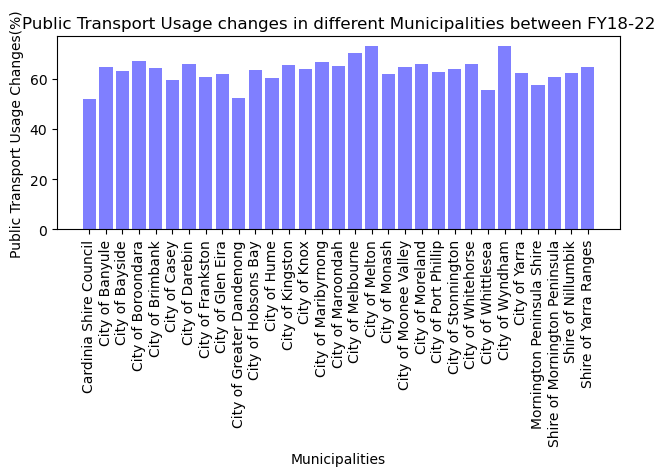

In [6]:
# Show Metropolitan Public Transport Usage changes in different Municipalities between FY18-22

x_axis = mean_muni.index
y_axis = mean_muni

plt.bar(x_axis, y_axis, color='b', alpha=0.5,align='center')
plt.title("Public Transport Usage changes in different Municipalities between FY18-22")
plt.xlabel("Municipalities")
plt.ylabel("Public Transport Usage Changes(%)")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("../Visualisations/Q1-1.jpg")
plt.show()

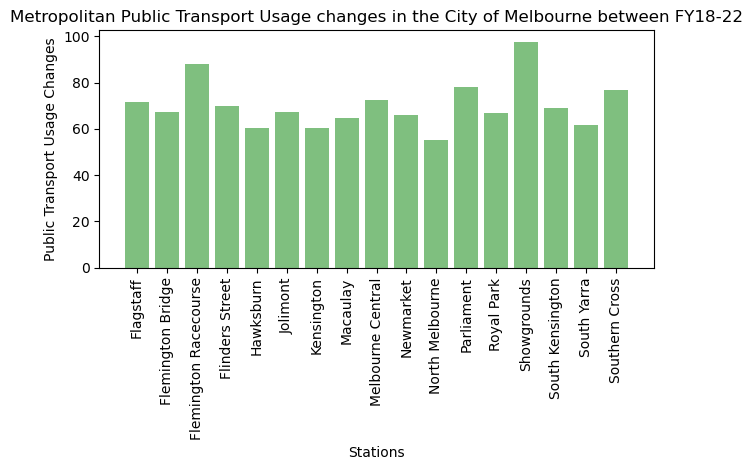

In [7]:
# Show Metropolitan Public Transport Usage changes each station in the City of Melbourne between FY18-22

mel_data = merge_changes.loc[merge_changes["Municipalities"]=="City of Melbourne",:]
mel_data

x_axis = mel_data["Stop_name"]
y_axis = mel_data["Greatest change in FY18-22(%)"]

plt.bar(x_axis, y_axis, color='g', alpha=0.5,align='center')
plt.title("Metropolitan Public Transport Usage changes in the City of Melbourne between FY18-22")
plt.xlabel("Stations")
plt.ylabel("Public Transport Usage Changes")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.savefig("../Visualisations/Q1-2.jpg")
plt.show()

In [8]:
# Hypothesis 1: The volume of public transport usage has decreased between 2018-2022.
# Null hypothesis 1: There has been no significant change in the volume of public transport usage over the time frame.
# Use ANOVA test to reject the null hypothesis or to fail to reject it.

# calculate each year's average public transport usage 
pax_2018_19 = clean_dup_data.loc[clean_dup_data["Fin_year"]=="FY18-19",:]
pax_2021_22 = clean_dup_data.loc[clean_dup_data["Fin_year"]=="FY21-22",:]

usage_2018_19 = pax_2018_19['Pax_annual'].unique()
usage_2021_22 = pax_2021_22['Pax_annual'].unique()

# Perform the ANOVA
stats.f_oneway(usage_2018_19,usage_2021_22)

F_onewayResult(statistic=10.554981906598059, pvalue=0.0012475589785107986)

In [9]:
# Hypothesis 2: The decline of each station's usage in the City of Melbourne has difference with whole Greater Melbourne between 2018-2022.
# Null hypothesis 2: There has been no significant difference in the decline of each station's usage in the City of Melbourne and whole Greater Melbourne over the time frame.
# Use independent t-test to reject the null hypothesis or to fail to reject it.

# Extract the daily counts for each sensor and time period
city_of_mel = mel_data["Greatest change in FY18-22(%)"]
overall = merge_changes["Greatest change in FY18-22(%)"]

# Perform the independent t-test
stats.ttest_ind(city_of_mel, overall, equal_var=False)

Ttest_indResult(statistic=2.4860628076962232, pvalue=0.023381452526985164)

In [10]:
# Conclusion：

# 1. Public Transport Usage dropped around 60% between FY18-22. City of Melton, City of Wyndham and City of Melbourne have the biggest decrease.
# 2. In the City of Melbourne, Showgrounds and Flemington Racecourse have the greatest change.
# 3. The volume of public transport usage has decreased between 2018-2022. Also, the decline of the station's usage in the City of Melbourne more than the Greater Melbourne.